Here, we classify sentences in PubMed Randomized control trials 
(RCT) abstracts into 5 categories viz; background, objective, 
methods, results and conclusions. The data is downloaded from KCL-Health-NLP github repository, 
and is already divided into train, development and test datasets.

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
try:
    import xlrd
except ImportError as e:
    !pip install xlrd
    import xlrd

import numpy as np

import warnings; warnings.simplefilter('ignore')

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to C:\Users\SEERAJA
[nltk_data]     KONNUR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\SEERAJA
[nltk_data]     KONNUR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from sklearn import metrics

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [181]:
from sklearn.linear_model import SGDClassifier

In [160]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [163]:
from sklearn.preprocessing import LabelEncoder

In [204]:
from sklearn.neural_network import MLPClassifier

In [74]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import seaborn as sns

import dev data as training data because it will be used for hyperparameter tuning 

In [10]:
training = 'https://raw.githubusercontent.com/KCL-Health-NLP/nlp_examples/master/pubmed/dev.txt'
train_data = pd.read_csv(training, sep='\t', header=None)

In [11]:
train_data.columns = ['number', 'label', 'text']

In [12]:
train_data.head()

,number,label,text
0,24290286,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...
1,24290286,BACKGROUND,It is not clear whether these patients would b...
2,24290286,OBJECTIVE,We sought to determine whether a 3-month cours...
3,24290286,METHODS,Asthmatic patients who were IgE sensitized to ...
4,24290286,METHODS,Primary outcomes were improvement in quality o...


In [13]:
train_data.shape

(30212, 3)

In [14]:
# count train labels

In [15]:
train_data['label'].value_counts()

METHODS        9964
RESULTS        9841
CONCLUSIONS    4582
BACKGROUND     3449
OBJECTIVE      2376
Name: label, dtype: int64

Please note: The main NLP technique of this code is TF-IDF which is there in this code later after count_vectorizer. Count_vectorizer was only used to compare the performance of the best classifier obtained from TF-IDF. As my laptop crashed, I had to redo few analysis which is why this count_vectorizer is before TF-IDF in this code.

In [16]:
first_vectorizer = CountVectorizer(ngram_range=(1,1), stop_words='english', tokenizer=word_tokenize, max_features=500)
first_vectorizer.fit(train_data['text'])
first_fit_transformed_data = first_vectorizer.transform(train_data['text'])

In [17]:
print(first_fit_transformed_data)

  (0, 9)	1
  (0, 96)	1
  (0, 133)	1
  (0, 340)	1
  (0, 354)	1
  (1, 9)	1
  (1, 101)	1
  (1, 340)	1
  (1, 472)	1
  (2, 9)	1
  (2, 96)	1
  (2, 169)	1
  (2, 248)	1
  (2, 332)	1
  (2, 340)	1
  (3, 7)	4
  (3, 9)	1
  (3, 22)	1
  (3, 28)	1
  (3, 35)	1
  (3, 47)	1
  (3, 157)	1
  (3, 167)	1
  (3, 186)	1
  (3, 216)	1
  :	:
  (30209, 228)	1
  (30209, 326)	1
  (30209, 340)	1
  (30209, 404)	1
  (30209, 485)	1
  (30210, 1)	1
  (30210, 7)	1
  (30210, 9)	1
  (30210, 18)	1
  (30210, 49)	1
  (30210, 131)	1
  (30210, 254)	1
  (30210, 261)	1
  (30210, 340)	2
  (30210, 365)	1
  (30210, 383)	1
  (30210, 406)	2
  (30210, 471)	1
  (30211, 4)	1
  (30211, 5)	1
  (30211, 7)	1
  (30211, 9)	1
  (30211, 51)	1
  (30211, 127)	1
  (30211, 322)	1


In [18]:
first_fit_transformed_data.shape

(30212, 500)

Parameters for hyperparameter tuning by grid search cv

In [19]:
# Decision trees

In [20]:
params_dt = {'max_depth' : [5,10,15], 'max_features': ['auto', 'sqrt']}

In [21]:
dt = DecisionTreeClassifier(random_state=42)

In [22]:
dt_1_cv = GridSearchCV(estimator=dt, param_grid=params_dt, cv= 3, scoring='f1_micro')

In [27]:
# random forest

In [28]:
params = {'n_estimators': [500, 750], 'max_features': ['auto', 'sqrt'], 'max_depth' : [5,10,15] }

In [29]:
rf = RandomForestClassifier(random_state=42)

In [30]:
rf_1_cv = GridSearchCV(estimator=rf, param_grid=params, cv= 3, scoring='f1_micro')

Only for SVM count vectorizer is carried out as it was the best classifier

In [35]:
# SVM

In [36]:
svm = SVC(random_state = 42)

In [37]:
params_svm = {'C': [1, 10], 'gamma': [0.1, 1],'kernel': ['linear','poly','sigmoid','rbf']}

In [38]:
svm_1_cv = GridSearchCV(estimator=svm, param_grid=params_svm, cv= 3, scoring='f1_micro')

In [39]:
svm_1_cv_result = svm_1_cv.fit(first_fit_transformed_data, train_data['label'])

In [40]:
svm_1_cv_result_best_score = svm_1_cv_result.best_score_
svm_1_cv_result_best_params = svm_1_cv_result.best_params_
svm_1_cv_result_best_model = svm_1_cv_result.best_estimator_

In [41]:
svm_1_cv_result_best_score

0.699622508064309

In [42]:
svm_1_cv_result_best_params

{'C': 1, 'gamma': 0.1, 'kernel': 'linear'}

In [43]:
# knn

In [44]:
knn = KNeighborsClassifier()
params_knn = {'n_neighbors':[3, 4, 5, 6]}
knn_1_cv = GridSearchCV(estimator=knn, param_grid=params_knn, cv= 3, scoring='f1_micro')

In [182]:
sgdc = SGDClassifier(random_state = 42)

In [183]:
params_sgdc = {'max_iter':[700, 1000]}

In [184]:
sgdc_1_cv = GridSearchCV(estimator=sgdc, param_grid=params_sgdc, cv= 3, scoring='f1_micro')

In [197]:
# multi layer perceptron

In [198]:
l_encoder = LabelEncoder()
l_encoder.fit(train_data['label'])
values_encoded = l_encoder.transform(train_data['label'])

In [201]:
values_encoded[0:10]

array([0, 0, 3, 2, 2, 4, 4, 4, 4, 1])

In [210]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(24, ), random_state = 42)

In [211]:
params_mlp = {'max_iter':[200, 300]}

In [212]:
mlp_1_cv = GridSearchCV(estimator=mlp, param_grid=params_mlp, cv= 3, scoring='f1_micro')

In [48]:
# after doing hyperparametr tuning on the dev data , now we will use these hyperparametrs and train a bigger model combining 
#dev and original train data

In [49]:
# importing train lets call this big train

In [50]:
big_train = 'https://raw.githubusercontent.com/KCL-Health-NLP/nlp_examples/master/pubmed/train.txt'
big_train_data = pd.read_csv(big_train, sep='\t', header=None)

In [51]:
big_train_data.columns = ['number', 'label', 'text']

In [52]:
big_train_data.head()

,number,label,text
0,24293578,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...
1,24293578,METHODS,A total of 125 patients with primary knee OA w...
2,24293578,METHODS,Outcome measures included pain reduction and i...
3,24293578,METHODS,Pain was assessed using the visual analog pain...
4,24293578,METHODS,Secondary outcome measures included the Wester...


In [53]:
# combine big_train and train

In [54]:
concatenated_data = np.concatenate((train_data['text'], big_train_data['text']), axis=0)
concatenated_data_label = np.concatenate((train_data['label'], big_train_data['label']), axis=0)

In [55]:
new_train_data = pd.DataFrame()
new_train_data['label'] = concatenated_data_label
new_train_data['text'] = concatenated_data

In [56]:
new_train_data.head()

,label,text
0,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...
1,BACKGROUND,It is not clear whether these patients would b...
2,OBJECTIVE,We sought to determine whether a 3-month cours...
3,METHODS,Asthmatic patients who were IgE sensitized to ...
4,METHODS,Primary outcomes were improvement in quality o...


In [57]:
new_train_data.tail()

,label,text
210247,RESULTS,For the absolute change in percent atheroma vo...
210248,RESULTS,"For PAV , a significantly greater percentage o..."
210249,RESULTS,Both strategies had acceptable side effect pro...
210250,CONCLUSIONS,"Compared with standard statin monotherapy , th..."
210251,CONCLUSIONS,( Plaque Regression With Cholesterol Absorptio...


In [58]:
new_train_data.shape

(210252, 2)

In [257]:
# only for SVM

In [59]:
first_vectorizer_new = CountVectorizer(ngram_range=(1,1), stop_words='english', tokenizer=word_tokenize, max_features=500)
first_vectorizer_new.fit(new_train_data['text'])
first_fit_transformed_data_new = first_vectorizer_new.transform(new_train_data['text'])

In [60]:
print(first_fit_transformed_data_new)

  (0, 8)	1
  (0, 95)	1
  (0, 131)	1
  (0, 335)	1
  (0, 350)	1
  (1, 8)	1
  (1, 100)	1
  (1, 335)	1
  (1, 471)	1
  (2, 8)	1
  (2, 95)	1
  (2, 167)	1
  (2, 242)	1
  (2, 328)	1
  (2, 335)	1
  (3, 6)	4
  (3, 8)	1
  (3, 21)	1
  (3, 27)	1
  (3, 33)	1
  (3, 46)	1
  (3, 155)	1
  (3, 166)	1
  (3, 183)	1
  (3, 213)	1
  :	:
  (210249, 6)	1
  (210249, 8)	1
  (210249, 112)	1
  (210249, 188)	1
  (210249, 200)	1
  (210249, 246)	1
  (210249, 280)	1
  (210250, 6)	2
  (210250, 8)	1
  (210250, 129)	1
  (210250, 134)	1
  (210250, 151)	1
  (210250, 223)	1
  (210250, 346)	1
  (210250, 392)	1
  (210250, 424)	1
  (210250, 437)	1
  (210251, 3)	1
  (210251, 4)	1
  (210251, 8)	1
  (210251, 50)	1
  (210251, 54)	1
  (210251, 55)	1
  (210251, 198)	1
  (210251, 392)	1


In [61]:
# test data

In [62]:
test = 'https://raw.githubusercontent.com/KCL-Health-NLP/nlp_examples/master/pubmed/test.txt'
test_data = pd.read_csv(test, sep='\t', header=None)

In [63]:
test_data.columns = ['number', 'label', 'text']

In [64]:
test_data.head()

,number,label,text
0,24845963,BACKGROUND,This study analyzed liver function abnormaliti...
1,24845963,RESULTS,A post hoc analysis was conducted with the use...
2,24845963,RESULTS,Liver function tests ( LFTs ) were measured at...
3,24845963,RESULTS,Survival analyses were used to assess the asso...
4,24845963,RESULTS,The percentage of patients with abnormal LFTs ...


In [65]:
test_data.shape

(30135, 3)

In [70]:
#transorm the test data

In [71]:
test_data_first_transformed = first_vectorizer_new.transform(test_data['text'])

In [72]:
print(test_data_first_transformed)

  (0, 3)	1
  (0, 4)	1
  (0, 8)	1
  (0, 63)	1
  (0, 80)	1
  (0, 210)	2
  (0, 216)	1
  (0, 230)	2
  (0, 335)	1
  (0, 422)	1
  (0, 446)	1
  (1, 3)	1
  (1, 4)	1
  (1, 8)	1
  (1, 79)	1
  (1, 88)	1
  (1, 143)	1
  (1, 156)	1
  (1, 190)	1
  (1, 199)	1
  (1, 210)	1
  (1, 230)	1
  (1, 370)	1
  (1, 446)	1
  (1, 479)	1
  :	:
  (30131, 487)	1
  (30131, 494)	1
  (30132, 8)	1
  (30132, 41)	1
  (30132, 94)	1
  (30132, 225)	1
  (30132, 411)	1
  (30132, 426)	1
  (30132, 471)	1
  (30132, 494)	1
  (30133, 8)	1
  (30133, 71)	1
  (30133, 191)	1
  (30133, 397)	1
  (30134, 6)	3
  (30134, 8)	1
  (30134, 98)	1
  (30134, 134)	1
  (30134, 157)	1
  (30134, 173)	1
  (30134, 243)	1
  (30134, 253)	1
  (30134, 362)	1
  (30134, 414)	1
  (30134, 487)	1


In [81]:
#svm

In [82]:
svm_1_new = SVC(C = 1, gamma = 0.1, kernel = 'linear', random_state = 42)

In [83]:
svm_1_new.fit(first_fit_transformed_data_new, new_train_data['label'])

SVC(C=1, gamma=0.1, kernel='linear', random_state=42)

In [84]:
svm_1_prediction = svm_1_new.predict(test_data_first_transformed)

In [85]:
cm_1_svm = confusion_matrix(test_data['label'], svm_1_prediction)
print(cm_1_svm)

[[1728  865  576  368   84]
 [ 539 2843  566   92  531]
 [ 456  295 8465  125  556]
 [ 637  282  345 1009   60]
 [ 226  669 1434    7 7377]]


<AxesSubplot:>

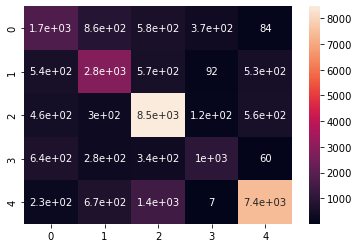

In [86]:
sns.heatmap(cm_1_svm, annot=True)

In [87]:
classification_report_1_svm = classification_report(test_data['label'], svm_1_prediction)
print(classification_report_1_svm)

              precision    recall  f1-score   support

  BACKGROUND       0.48      0.48      0.48      3621
 CONCLUSIONS       0.57      0.62      0.60      4571
     METHODS       0.74      0.86      0.80      9897
   OBJECTIVE       0.63      0.43      0.51      2333
     RESULTS       0.86      0.76      0.81      9713

    accuracy                           0.71     30135
   macro avg       0.66      0.63      0.64     30135
weighted avg       0.71      0.71      0.71     30135



# TFIDF vectorizer

In [99]:
stopWords = set(stopwords.words('english'))
tfidf_vect = TfidfVectorizer(ngram_range=(1,1), tokenizer=word_tokenize, stop_words=stopWords, max_features=500)
tfidf_vect.fit(train_data['text'])
second_fit_transformed_data =  tfidf_vect.transform(train_data['text'])

In [100]:
second_fit_transformed_data.shape

(30212, 500)

In [101]:
dt_2_cv_result = dt_1_cv.fit(second_fit_transformed_data, train_data['label'])

In [102]:
dt_2_cv_result_best_score = dt_2_cv_result.best_score_
dt_2_cv_result_best_params = dt_2_cv_result.best_params_
dt_2_cv_result_best_model = dt_2_cv_result.best_estimator_

In [103]:
dt_2_cv_result_best_score

0.5041367035524111

In [104]:
dt_2_cv_result_best_params

{'max_depth': 15, 'max_features': 'auto'}

In [105]:
# random forest

In [106]:
rf_2_cv_result = rf_1_cv.fit(second_fit_transformed_data, train_data['label'])

In [107]:
rf_2_cv_result_best_score = rf_2_cv_result.best_score_
rf_2_cv_result_best_params = rf_2_cv_result.best_params_
rf_2_cv_result_best_model = rf_2_cv_result.best_estimator_

In [108]:
rf_2_cv_result_best_score

0.5963192219057994

In [109]:
rf_2_cv_result_best_params

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 750}

In [110]:
# svm

In [111]:
svm_2_cv_result = svm_1_cv.fit(second_fit_transformed_data, train_data['label'])

In [112]:
svm_2_cv_result_best_score = svm_2_cv_result.best_score_
svm_2_cv_result_best_params = svm_2_cv_result.best_params_
svm_2_cv_result_best_model = svm_2_cv_result.best_estimator_

In [113]:
svm_2_cv_result_best_score

0.7245463005445186

In [114]:
svm_2_cv_result_best_params

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [115]:
# knn

In [116]:
knn_2_cv_result = knn_1_cv.fit(second_fit_transformed_data, train_data['label'])

In [148]:
knn_2_cv_result_best_score = knn_2_cv_result.best_score_
knn_2_cv_result_best_params = knn_2_cv_result.best_params_
knn_2_cv_result_best_model = knn_2_cv_result.best_estimator_

In [152]:
knn_2_cv_result_best_score

0.5533559000214662

In [155]:
knn_2_cv_result_best_params

{'n_neighbors': 6}

In [185]:
sgdc_2_cv_result = sgdc_1_cv.fit(second_fit_transformed_data, train_data['label'])

In [186]:
sgdc_2_cv_result_best_score = sgdc_2_cv_result.best_score_
sgdc_2_cv_result_best_params = sgdc_2_cv_result.best_params_
sgdc_2_cv_result_best_model = sgdc_2_cv_result.best_estimator_

In [187]:
sgdc_2_cv_result_best_score

0.7003507108796003

In [188]:
sgdc_2_cv_result_best_params

{'max_iter': 700}

In [209]:
# MLP 

In [224]:
mlp_2_cv_result = mlp_1_cv.fit(second_fit_transformed_data, values_encoded)

In [225]:
mlp_2_cv_result_best_score = mlp_2_cv_result.best_score_
mlp_2_cv_result_best_params = mlp_2_cv_result.best_params_
mlp_2_cv_result_best_model = mlp_2_cv_result.best_estimator_

In [226]:
mlp_2_cv_result_best_score

0.6969081323332574

In [227]:
mlp_2_cv_result_best_params

{'max_iter': 200}

In [ ]:
# running on big train data

In [120]:
stopWords = set(stopwords.words('english'))
tfidf_vect_new = TfidfVectorizer(ngram_range=(1,1), tokenizer=word_tokenize, stop_words=stopWords, max_features=500)
tfidf_vect_new.fit(new_train_data['text'])
second_fit_transformed_data_new =  tfidf_vect_new.transform(new_train_data['text'])

In [121]:
# transform test data with second (TFIDF vect)

In [122]:
test_data_second_transformed = tfidf_vect_new.transform(test_data['text'])

In [123]:
# decision trees

In [124]:
dt_2_new = DecisionTreeClassifier(max_depth = 15, max_features= 'auto', random_state = 42)

In [125]:
dt_2_new.fit(second_fit_transformed_data_new, new_train_data['label'])

DecisionTreeClassifier(max_depth=15, max_features='auto', random_state=42)

In [126]:
dt_2_prediction = dt_2_new.predict(test_data_second_transformed)

In [127]:
cm_2_dt = confusion_matrix(test_data['label'], dt_2_prediction)
print(cm_2_dt)

[[ 234  139 3116   65   67]
 [  54  443 3847   10  217]
 [  25   22 9551   37  262]
 [  51   50 1914  273   45]
 [  14   46 4682    6 4965]]


<AxesSubplot:>

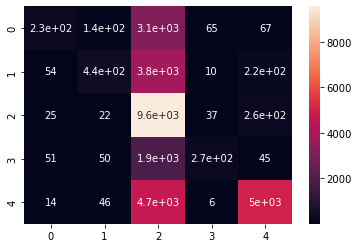

In [128]:
sns.heatmap(cm_2_dt, annot=True)

In [135]:
classification_report_2_dt = classification_report(test_data['label'], dt_2_prediction)
print(classification_report_2_dt)

              precision    recall  f1-score   support

  BACKGROUND       0.62      0.06      0.12      3621
 CONCLUSIONS       0.63      0.10      0.17      4571
     METHODS       0.41      0.97      0.58      9897
   OBJECTIVE       0.70      0.12      0.20      2333
     RESULTS       0.89      0.51      0.65      9713

    accuracy                           0.51     30135
   macro avg       0.65      0.35      0.34     30135
weighted avg       0.65      0.51      0.45     30135



In [129]:
# random forest

In [130]:
rf_2_new = RandomForestClassifier(n_estimators = 750, max_depth = 15, max_features = 'auto', random_state=42)

In [131]:
rf_2_new.fit(second_fit_transformed_data_new, new_train_data['label'])

RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=750,
                       random_state=42)

In [132]:
rf_2_prediction = rf_2_new.predict(test_data_second_transformed)

In [133]:
cm_2_rf = confusion_matrix(test_data['label'], rf_2_prediction)
print(cm_2_rf)

[[ 244  258 2922   84  113]
 [  21 1087 2946    1  516]
 [   4   32 9453    7  401]
 [  19   99 1817  318   80]
 [   1   88 2921    0 6703]]


<AxesSubplot:>

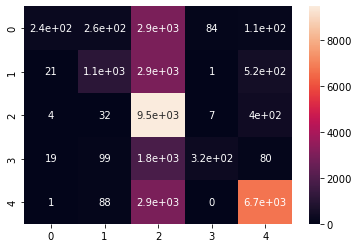

In [134]:
sns.heatmap(cm_2_rf, annot=True)

In [136]:
classification_report_2_rf = classification_report(test_data['label'], rf_2_prediction)
print(classification_report_2_rf)

              precision    recall  f1-score   support

  BACKGROUND       0.84      0.07      0.12      3621
 CONCLUSIONS       0.70      0.24      0.35      4571
     METHODS       0.47      0.96      0.63      9897
   OBJECTIVE       0.78      0.14      0.23      2333
     RESULTS       0.86      0.69      0.76      9713

    accuracy                           0.59     30135
   macro avg       0.73      0.42      0.42     30135
weighted avg       0.70      0.59      0.54     30135



In [137]:
# svm

In [138]:
svm_2_new = SVC(C = 1, gamma = 1, kernel = 'rbf', random_state = 42)

In [139]:
svm_2_new.fit(second_fit_transformed_data_new, new_train_data['label'])

SVC(C=1, gamma=1, random_state=42)

In [140]:
svm_2_prediction = svm_2_new.predict(test_data_second_transformed)

In [141]:
cm_2_svm = confusion_matrix(test_data['label'], svm_2_prediction)
print(cm_2_svm)

[[1936  787  445  347  106]
 [ 448 3055  440   64  564]
 [ 326  250 8664  103  554]
 [ 617  296  298 1057   65]
 [ 185  584 1137    6 7801]]


<AxesSubplot:>

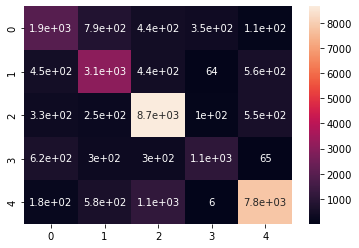

In [142]:
sns.heatmap(cm_2_svm, annot=True)

In [143]:
classification_report_2_svm = classification_report(test_data['label'], svm_2_prediction)
print(classification_report_2_svm)

              precision    recall  f1-score   support

  BACKGROUND       0.55      0.53      0.54      3621
 CONCLUSIONS       0.61      0.67      0.64      4571
     METHODS       0.79      0.88      0.83      9897
   OBJECTIVE       0.67      0.45      0.54      2333
     RESULTS       0.86      0.80      0.83      9713

    accuracy                           0.75     30135
   macro avg       0.70      0.67      0.68     30135
weighted avg       0.75      0.75      0.74     30135



In [196]:
# knn

In [237]:
knn_2_new = KNeighborsClassifier(n_neighbors=6)

In [238]:
knn_2_new.fit(second_fit_transformed_data_new, new_train_data['label'])

KNeighborsClassifier(n_neighbors=6)

In [239]:
knn_2_prediction = knn_2_new.predict(test_data_second_transformed)

In [240]:
cm_2_knn = confusion_matrix(test_data['label'], knn_2_prediction)
print(cm_2_knn)

[[1999  639  565  251  167]
 [1190 2052  643   87  599]
 [ 767  604 7650   89  787]
 [ 853  337  447  593  103]
 [ 548  739 1528   42 6856]]


<AxesSubplot:>

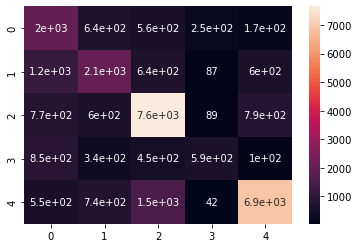

In [241]:
sns.heatmap(cm_2_knn, annot=True)

In [242]:
classification_report_2_knn = classification_report(test_data['label'], knn_2_prediction)
print(classification_report_2_knn)

              precision    recall  f1-score   support

  BACKGROUND       0.37      0.55      0.45      3621
 CONCLUSIONS       0.47      0.45      0.46      4571
     METHODS       0.71      0.77      0.74      9897
   OBJECTIVE       0.56      0.25      0.35      2333
     RESULTS       0.81      0.71      0.75      9713

    accuracy                           0.64     30135
   macro avg       0.58      0.55      0.55     30135
weighted avg       0.65      0.64      0.64     30135



In [189]:
# sgdc

In [190]:
sgdc_2_new = SGDClassifier(max_iter = 700, random_state = 42)

In [191]:
sgdc_2_new.fit(second_fit_transformed_data_new, new_train_data['label'])

SGDClassifier(max_iter=700, random_state=42)

In [192]:
sgdc_2_prediction = sgdc_2_new.predict(test_data_second_transformed)

In [193]:
cm_2_sgdc = confusion_matrix(test_data['label'], sgdc_2_prediction)
print(cm_2_sgdc)

[[ 994  987  953  429  258]
 [ 235 2573  782  119  862]
 [ 173  213 8737  156  618]
 [ 246  386  582  993  126]
 [ 101  408 1587   10 7607]]


<AxesSubplot:>

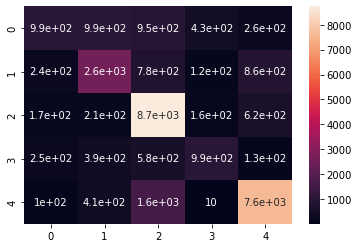

In [194]:
sns.heatmap(cm_2_sgdc, annot=True)

In [195]:
classification_report_2_sgdc = classification_report(test_data['label'], sgdc_2_prediction)
print(classification_report_2_sgdc)

              precision    recall  f1-score   support

  BACKGROUND       0.57      0.27      0.37      3621
 CONCLUSIONS       0.56      0.56      0.56      4571
     METHODS       0.69      0.88      0.78      9897
   OBJECTIVE       0.58      0.43      0.49      2333
     RESULTS       0.80      0.78      0.79      9713

    accuracy                           0.69     30135
   macro avg       0.64      0.59      0.60     30135
weighted avg       0.68      0.69      0.68     30135



In [243]:
# sgdc balanced (including class weights)

In [245]:
sgdc_3_new = SGDClassifier(max_iter = 700, class_weight = 'balanced', random_state = 42)
sgdc_3_new.fit(second_fit_transformed_data_new, new_train_data['label'])

SGDClassifier(class_weight='balanced', max_iter=700, random_state=42)

In [246]:
sgdc_3_prediction = sgdc_3_new.predict(test_data_second_transformed)

In [248]:
cm_3_sgdc = confusion_matrix(test_data['label'], sgdc_3_prediction)
print(cm_3_sgdc)

[[1607  900  427  573  114]
 [ 552 2933  427  177  482]
 [ 458  383 8121  339  596]
 [ 459  344  273 1198   59]
 [ 244  777 1347   46 7299]]


<AxesSubplot:>

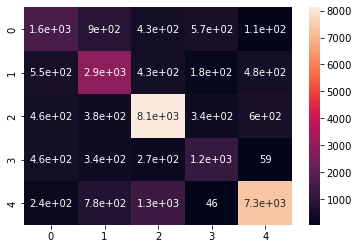

In [249]:
sns.heatmap(cm_3_sgdc, annot=True)

In [250]:
classification_report_3_sgdc = classification_report(test_data['label'], sgdc_3_prediction)
print(classification_report_3_sgdc)

              precision    recall  f1-score   support

  BACKGROUND       0.48      0.44      0.46      3621
 CONCLUSIONS       0.55      0.64      0.59      4571
     METHODS       0.77      0.82      0.79      9897
   OBJECTIVE       0.51      0.51      0.51      2333
     RESULTS       0.85      0.75      0.80      9713

    accuracy                           0.70     30135
   macro avg       0.63      0.63      0.63     30135
weighted avg       0.71      0.70      0.70     30135



In [247]:
# mlp

In [228]:
l2_encoder = LabelEncoder()
l2_encoder.fit(new_train_data['label'])
values_encoded_new = l2_encoder.transform(new_train_data['label'])

In [231]:
values_test= l2_encoder.transform(test_data['label'])

In [229]:
mlp_2_new = MLPClassifier(max_iter=200, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(24, ), random_state = 42)

In [230]:
mlp_2_new.fit(second_fit_transformed_data_new, values_encoded_new)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(24,), random_state=42,
              solver='lbfgs')

In [232]:
mlp_2_prediction = mlp_2_new.predict(test_data_second_transformed)

In [234]:
cm_2_mlp = confusion_matrix(values_test, mlp_2_prediction)
print(cm_2_mlp)

[[1857  732  471  405  156]
 [ 527 2907  476   66  595]
 [ 349  267 8461  137  683]
 [ 612  266  307 1071   77]
 [ 185  605 1193   14 7716]]


<AxesSubplot:>

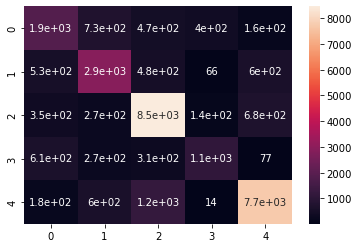

In [235]:
sns.heatmap(cm_2_mlp, annot=True)

In [236]:
classification_report_2_mlp = classification_report(values_test, mlp_2_prediction)
print(classification_report_2_mlp)

              precision    recall  f1-score   support

           0       0.53      0.51      0.52      3621
           1       0.61      0.64      0.62      4571
           2       0.78      0.85      0.81      9897
           3       0.63      0.46      0.53      2333
           4       0.84      0.79      0.81      9713

    accuracy                           0.73     30135
   macro avg       0.68      0.65      0.66     30135
weighted avg       0.73      0.73      0.73     30135



In [251]:
# bar plot 

In [252]:
classifier = ['decision_trees', 'random_forests', 'SVM', 'KNN', 'SGDClassifier', 'MLP']

In [253]:
f1_micro_scores = [0.50, 0.60, 0.72, 0.55, 0.70, 0.69]

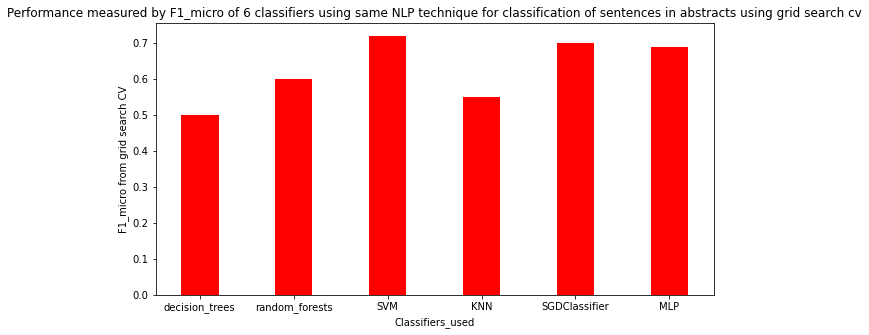

In [256]:
fig = plt.figure(figsize = (10, 5))
plt.bar(classifier, f1_micro_scores, color ='red',
        width = 0.4)
plt.xlabel("Classifiers_used")
plt.ylabel("F1_micro from grid search CV")
plt.title("Performance measured by F1_micro of 6 classifiers using same NLP technique for classification of sentences in abstracts using grid search cv")
plt.show()